In [202]:
#加载数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data=pd.read_excel('data_house.xlsx',sheetname= 'Sheet1')
num=5
data.tail()

E:\anoconda\envs\tensorflow\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,年份,商品房施工面积（万平方米）,房地产开发投资额（亿）,城镇居民人均可支配收入（元）,城镇化率,GDP（亿元）,预测价格
11,2016,4408.650000,642.760000,54628.616667,0.891400,6827.670000,16527
12,2017,4553.680000,702.150000,57608.133333,0.898600,7582.120000,18964
13,2018,4785.950385,755.764615,60587.650000,0.904405,7677.163846,1
14,2019,5086.335934,806.222857,63567.166667,0.908529,8098.388462,1
15,2020,5386.721484,856.681099,66546.683333,0.912653,8519.613077,1


In [203]:
X=data.iloc[0:,1:6]
X.tail()

,商品房施工面积（万平方米）,房地产开发投资额（亿）,城镇居民人均可支配收入（元）,城镇化率,GDP（亿元）
11,4408.650000,642.760000,54628.616667,0.891400,6827.670000
12,4553.680000,702.150000,57608.133333,0.898600,7582.120000
13,4785.950385,755.764615,60587.650000,0.904405,7677.163846
14,5086.335934,806.222857,63567.166667,0.908529,8098.388462
15,5386.721484,856.681099,66546.683333,0.912653,8519.613077


In [204]:
y=data.iloc[0:13,6:]
y.tail()

,预测价格
8,9162
9,9783
10,13743
11,16527
12,18964


In [205]:
yy=y

In [206]:
X=(X - X.min()) / (X.max() - X.min())
X.tail()

,商品房施工面积（万平方米）,房地产开发投资额（亿）,城镇居民人均可支配收入（元）,城镇化率,GDP（亿元）
11,0.768589,0.699655,0.727055,0.656408,0.733013
12,0.802903,0.783038,0.795291,0.772810,0.852064
13,0.857858,0.858313,0.863527,0.866667,0.867062
14,0.928929,0.929157,0.931764,0.933333,0.933531
15,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
y=(y - y.min()) / (y.max() - y.min())
y.tail()

,预测价格
8,0.322317
9,0.365252
10,0.639035
11,0.831513
12,1.000000


In [208]:
X_train=X.iloc[0:13,0:]

In [209]:
y_train=y

In [210]:
#测试集概率对比
from sklearn.linear_model import LinearRegression
logit=LinearRegression()
logit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [211]:
X_test=X.iloc[13:,0:]
X_test

,商品房施工面积（万平方米）,房地产开发投资额（亿）,城镇居民人均可支配收入（元）,城镇化率,GDP（亿元）
13,0.857858,0.858313,0.863527,0.866667,0.867062
14,0.928929,0.929157,0.931764,0.933333,0.933531
15,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
y_predict=logit.predict(X_test)[:,0]
y_predict

array([0.84485803, 0.91594194, 0.98702585])

In [213]:
y2019=y_predict[0]*(yy.max()-yy.min())+yy.min()
y2020=y_predict[1]*(yy.max()-yy.min())+yy.min()
y2021=y_predict[2]*(yy.max()-yy.min())+yy.min()
print('predict2019:',y2019)
print('predict2020:',y2020)
print('predict2021:',y2021)

predict2019: 预测价格    16720.026616
dtype: float64
predict2020: 预测价格    17748.184265
dtype: float64
predict2021: 预测价格    18776.341914
dtype: float64


In [216]:
print('系数',logit.coef_[0])
print('截距',logit.intercept_)

系数 [ 1.57381267 -1.5463521  -0.60901394 -0.28575452  1.94658475]
截距 [-0.092251]


array([ 1.57381267, -1.5463521 , -0.60901394, -0.28575452,  1.94658475])

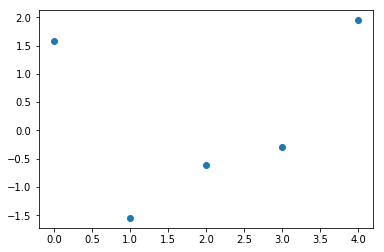

In [215]:
plt.plot(logit.coef_[0], 'o', label = 'linear regression')
logit.coef_[0]